<a href="https://colab.research.google.com/github/devjaime/data_science_escalab/blob/main/Copia_de_2021_12_09_Clase_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 10
## “Operaciones sobre Grupos y Series de Tiempo”

In [ ]:
from io import StringIO

import pandas as pd
import numpy as np

## Operaciones sobre grupos

### Esquema *groupby*

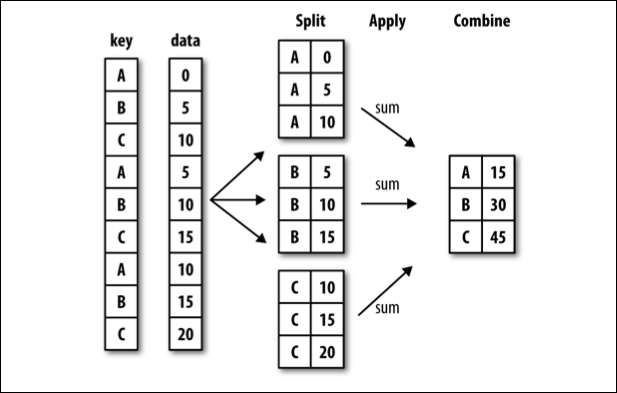

Generally speaking, “group by” is referring to a process involving one or more of the following steps:

>_(1) Splitting the data into groups. (2). Applying a function to each group independently, (3) Combining the results into a data structure._

> *Out of these, Pandas groupby() is widely used for the split step and it’s the most straightforward. In fact, in many situations, we may wish to do something with those groups. In the apply step, we might wish to do one of the following:*

> _**Aggregation:** compute a summary statistic for each group. for example, sum, mean, or count._

> _**Transformation:** perform some group-specific computations and return a like-indexed object. For example, standardize data within a group or replacing missing values within groups._

> _**Filtration:** discard some groups, according to a group-wise computation that evaluates True or False . For example, discard data that belongs to groups with only a few members or filter out data based on the group sum or mean._

> _By Pandas Official Tutorial: [groupby: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)_

### Funciones de agregación sobre agrupaciones básicas

In [ ]:
df1 = """
clave1,clave2,data1,data2
a,uno,0.2720301982554746,0.5669459223937555
a,dos,0.8717223317255172,0.4584050293382429
b,uno,0.04313017518656113,2.1677798239414963
b,dos,0.5501076122749952,0.25096868021374963
a,uno,1.253173513544626,0.1385380989587372
"""

df = pd.read_csv(StringIO(df1))
df

,clave1,clave2,data1,data2
0,a,uno,0.272030,0.566946
1,a,dos,0.871722,0.458405
2,b,uno,0.043130,2.167780
3,b,dos,0.550108,0.250969
4,a,uno,1.253174,0.138538


In [ ]:
agrupados = df.groupby('clave1')
print(agrupados.groups)

{'a': [0, 1, 4], 'b': [2, 3]}


In [ ]:
# obtiene al promedio para cada grupo y cada columna
media = agrupados.mean()
media

,data1,data2
clave1,,
a,0.798975,0.387963
b,0.296619,1.209374


In [ ]:
agrupados.max()

,clave2,data1,data2
clave1,,,
a,uno,1.253174,0.566946
b,uno,0.550108,2.167780


In [ ]:
agrupados.min()

,clave2,data1,data2
clave1,,,
a,dos,0.27203,0.138538
b,dos,0.04313,0.250969


In [ ]:
media.index.name

'clave1'

### Agrupación según secuencias

- El o los arreglos deben ser igual a la cantidad de filas/columnas que se desean agrupar.
- Es como asignarle un *tipo* a cada una.

In [ ]:
ciudades = np.array(['Concepción', 'Santiago', 'Santiago', 'Concepción', 'Concepción'])
años = np.array([2005, 2005, 2006, 2005, 2006])

In [ ]:
ciudades # U is for unicode,el número es por caracteres

array(['Concepción', 'Santiago', 'Santiago', 'Concepción', 'Concepción'],
      dtype='<U10')

In [ ]:
# df, ciudades y año tienen 5 "filas"
print(df)
print('\n---------------------------\n')
print(ciudades)
print(años)
print('\n---------------------------\n')
df['data1'].groupby([ciudades, años]).mean()

  clave1 clave2     data1     data2
0      a    uno  0.272030  0.566946
1      a    dos  0.871722  0.458405
2      b    uno  0.043130  2.167780
3      b    dos  0.550108  0.250969
4      a    uno  1.253174  0.138538

---------------------------

['Concepción' 'Santiago' 'Santiago' 'Concepción' 'Concepción']
[2005 2005 2006 2005 2006]

---------------------------



Concepción  2005    0.411069
            2006    1.253174
Santiago    2005    0.871722
            2006    0.043130
Name: data1, dtype: float64

In [ ]:
df.groupby('clave1').mean()

,data1,data2
clave1,,
a,0.798975,0.387963
b,0.296619,1.209374


In [ ]:
df

,clave1,clave2,data1,data2
0,a,uno,0.272030,0.566946
1,a,dos,0.871722,0.458405
2,b,uno,0.043130,2.167780
3,b,dos,0.550108,0.250969
4,a,uno,1.253174,0.138538


### Agrupación según múltiples claves

In [ ]:
df.groupby(['clave1', 'clave2']).mean()

data1     data2
clave1 clave2                    
a      dos     0.871722  0.458405
       uno     0.762602  0.352742
b      dos     0.550108  0.250969
       uno     0.043130  2.167780

In [ ]:
df.groupby(['clave1', 'clave2']).size()

clave1  clave2
a       dos       1
        uno       2
b       dos       1
        uno       1
dtype: int64

In [ ]:
for group_name, group_df in df.groupby('clave1'):
    print('Nombre:', group_name)
    print()
    print('Datos:\n', group_df, '\n')

Nombre: a

Datos:
   clave1 clave2     data1     data2
0      a    uno  0.272030  0.566946
1      a    dos  0.871722  0.458405
4      a    uno  1.253174  0.138538 

Nombre: b

Datos:
   clave1 clave2     data1     data2
2      b    uno  0.043130  2.167780
3      b    dos  0.550108  0.250969 



In [ ]:
for (k1, k2), grupo in df.groupby(['clave1', 'clave2']):
    print('Claves:', k1, k2)
    print()
    print('Datos:\n', grupo, '\n')

Claves: a dos

Datos:
   clave1 clave2     data1     data2
1      a    dos  0.871722  0.458405 

Claves: a uno

Datos:
   clave1 clave2     data1     data2
0      a    uno  0.272030  0.566946
4      a    uno  1.253174  0.138538 

Claves: b dos

Datos:
   clave1 clave2     data1     data2
3      b    dos  0.550108  0.250969 

Claves: b uno

Datos:
   clave1 clave2    data1    data2
2      b    uno  0.04313  2.16778 



Para acceder a un grupo con clave compuesta es por una tupla

In [ ]:
df.groupby(['clave1', 'clave2']).get_group(('a', 'uno'))

,clave1,clave2,data1,data2
0,a,uno,0.272030,0.566946
4,a,uno,1.253174,0.138538


Podríamos agrupar sin considerar el índice

In [ ]:
df.groupby(['clave1', 'clave2'], as_index=False).mean()
# df.groupby(['clave1', 'clave2']).mean()

,clave1,clave2,data1,data2
0,a,dos,0.871722,0.458405
1,a,uno,0.762602,0.352742
2,b,dos,0.550108,0.250969
3,b,uno,0.043130,2.167780


### Agrupación de columnas

In [ ]:
pers_csv = """
,a,b,c,d,e
Joe,-1.3145667658254518,-0.13464095208269006,1.2327918545834509,0.6497581243555293,-0.9548185834262666
Steve,2.59263341426371,0.2564189846685417,-1.43998132425686,0.2808643162372869,1.3343283425162658
Wes,-0.3361620360935273,,,1.8761263657971758,-0.6213816386981411
Jim,1.027190104967579,0.5808514716928929,0.2763808943213661,0.10948724226872676,-0.3643251144188017
Travis,1.6429467521498198,-0.6459219338347073,-0.5969866769821237,-0.9602484909863086,-1.1664374670425768
"""

personas = pd.read_csv(StringIO(pers_csv), index_col=0)
personas

,a,b,c,d,e
Joe,-1.314567,-0.134641,1.232792,0.649758,-0.954819
Steve,2.592633,0.256419,-1.439981,0.280864,1.334328
Wes,-0.336162,NaN,NaN,1.876126,-0.621382
Jim,1.027190,0.580851,0.276381,0.109487,-0.364325
Travis,1.642947,-0.645922,-0.596987,-0.960248,-1.166437


In [ ]:
mapeo = {'a': 'rojo', 'b': 'azul' ,'c': 'azul', 'd': 'azul', 'e': 'rojo', 'f': 'naranjo'}
mapeo

{'a': 'rojo',
 'b': 'azul',
 'c': 'azul',
 'd': 'azul',
 'e': 'rojo',
 'f': 'naranjo'}

- Agrupamos varias columnas según un `mapeo (dict)`
- Todas las columnas indicadas en las `keys` se agrupan con el valor `value`.

In [ ]:
por_columna = personas.groupby(mapeo, axis='columns')
print(por_columna.groups)
por_columna.sum()

{'azul': ['b', 'c', 'd'], 'rojo': ['a', 'e']}


,azul,rojo
Joe,1.747909,-2.269385
Steve,-0.902698,3.926962
Wes,1.876126,-0.957544
Jim,0.966720,0.662865
Travis,-2.203157,0.476509


In [ ]:
s1 = pd.Series(mapeo) # ocupa key como index y value como valor
s1

a       rojo
b       azul
c       azul
d       azul
e       rojo
f    naranjo
dtype: object

In [ ]:
personas

,a,b,c,d,e
Joe,-1.314567,-0.134641,1.232792,0.649758,-0.954819
Steve,2.592633,0.256419,-1.439981,0.280864,1.334328
Wes,-0.336162,NaN,NaN,1.876126,-0.621382
Jim,1.027190,0.580851,0.276381,0.109487,-0.364325
Travis,1.642947,-0.645922,-0.596987,-0.960248,-1.166437


- Al agrupar según una `series`, se obtiene el mismo resultados que utilizando un `dict`. En este caso, los  índices actuarían como `keys`.

In [ ]:
personas.groupby(s1, axis='columns').groups

{'azul': ['b', 'c', 'd'], 'rojo': ['a', 'e']}

In [ ]:
print(df.dtypes)
df

clave1     object
clave2     object
data1     float64
data2     float64
dtype: object


,clave1,clave2,data1,data2
0,a,uno,0.272030,0.566946
1,a,dos,0.871722,0.458405
2,b,uno,0.043130,2.167780
3,b,dos,0.550108,0.250969
4,a,uno,1.253174,0.138538


Podemos separar un dataframe según el tipo de columna

In [ ]:
# df.dtypes es una series

agrupados = df.groupby(df.dtypes, axis='columns')

for tipo, grupo in agrupados:
    print('Tipo:', tipo)
    print('Datos:\n', grupo, '\n')

Tipo: float64
Datos:
       data1     data2
0  0.272030  0.566946
1  0.871722  0.458405
2  0.043130  2.167780
3  0.550108  0.250969
4  1.253174  0.138538 

Tipo: object
Datos:
   clave1 clave2
0      a    uno
1      a    dos
2      b    uno
3      b    dos
4      a    uno 



### Agrupación según función

In [ ]:
# utilizar la función len() para agrupar
# se agrupan todos los nombres (index) del  mismo largo

pers_len = personas.groupby(len)
pers_len.groups

{3: ['Joe', 'Wes', 'Jim'], 5: ['Steve'], 6: ['Travis']}

In [ ]:
pers_len.sum() # la sumatoria de cada columna, para cada grupo

,a,b,c,d,e
3,-0.623539,0.446211,1.509173,2.635372,-1.940525
5,2.592633,0.256419,-1.439981,0.280864,1.334328
6,1.642947,-0.645922,-0.596987,-0.960248,-1.166437


In [ ]:
pers_len.size() # cuantos elementos tiene cada grupo

3    3
5    1
6    1
dtype: int64

In [ ]:
print(pers_len.get_group(3))
print('\n------------------------------------------------------\n')
pers_len.count() # cuenta la cantidad de valores no nulos en cada celda

            a         b         c         d         e
Joe -1.314567 -0.134641  1.232792  0.649758 -0.954819
Wes -0.336162       NaN       NaN  1.876126 -0.621382
Jim  1.027190  0.580851  0.276381  0.109487 -0.364325

------------------------------------------------------



,a,b,c,d,e
3,3,2,2,3,3
5,1,1,1,1,1
6,1,1,1,1,1


Si podemos ocupar una *función tradicional* también podemos utilizar una `lambda`.

In [ ]:
pers_len = personas.groupby(lambda x: 'par' if len(x)%2==0 else 'impar')
pers_len.groups

{'impar': ['Joe', 'Steve', 'Wes', 'Jim'], 'par': ['Travis']}

### Agrupación según función+secuencia

In [ ]:
claves = ['uno', 'uno', 'uno', 'dos', 'dos']
print(personas)
print('\n----------------------------------------------------------\n')

# el arreglo tiene el mismo largo que la cantidad de filas del df
# resulta una clave compuesta

pers_lc = personas.groupby([len, claves])
pers_lc.groups

               a         b         c         d         e
Joe    -1.314567 -0.134641  1.232792  0.649758 -0.954819
Steve   2.592633  0.256419 -1.439981  0.280864  1.334328
Wes    -0.336162       NaN       NaN  1.876126 -0.621382
Jim     1.027190  0.580851  0.276381  0.109487 -0.364325
Travis  1.642947 -0.645922 -0.596987 -0.960248 -1.166437

----------------------------------------------------------



{(3, 'dos'): ['Jim'], (3, 'uno'): ['Joe', 'Wes'], (5, 'uno'): ['Steve'], (6, 'dos'): ['Travis']}

In [ ]:
pers_lc.min().add_prefix('min_') # también sirve con las otras funciones de agregación

min_a     min_b     min_c     min_d     min_e
3 dos  1.027190  0.580851  0.276381  0.109487 -0.364325
  uno -1.314567 -0.134641  1.232792  0.649758 -0.954819
5 uno  2.592633  0.256419 -1.439981  0.280864  1.334328
6 dos  1.642947 -0.645922 -0.596987 -0.960248 -1.166437

In [ ]:
df = pd.read_csv(StringIO(df1))
print(df)
print()

agrupados = df.groupby('clave1')
agrupados.groups

  clave1 clave2     data1     data2
0      a    uno  0.272030  0.566946
1      a    dos  0.871722  0.458405
2      b    uno  0.043130  2.167780
3      b    dos  0.550108  0.250969
4      a    uno  1.253174  0.138538



{'a': [0, 1, 4], 'b': [2, 3]}

Podemos crear nuestra propia *función de agregación*. **El  único cuidado es que debe recibir un `arreglo` y entregar un único valor.**

In [ ]:
def amplitud(arr):
    return arr.max() - arr.min()

In [ ]:
agrupados.aggregate(amplitud)

,data1,data2
clave1,,
a,0.981143,0.428408
b,0.506977,1.916811


Normalmente se ocupa `agg` porque es más corto.

In [ ]:
agrupados.agg(amplitud) # equivalente a ocupar aggregate

,data1,data2
clave1,,
a,0.981143,0.428408
b,0.506977,1.916811


In [ ]:
print(df.describe())
print()
agrupados.describe()

          data1     data2
count  5.000000  5.000000
mean   0.598033  0.716528
std    0.479741  0.828546
min    0.043130  0.138538
25%    0.272030  0.250969
50%    0.550108  0.458405
75%    0.871722  0.566946
max    1.253174  2.167780



data1                      ...     data2                    
       count      mean       std  ...       50%       75%       max
clave1                            ...                              
a        3.0  0.798975  0.494600  ...  0.458405  0.512675  0.566946
b        2.0  0.296619  0.358487  ...  1.209374  1.688577  2.167780

[2 rows x 16 columns]

In [ ]:
agrupados.describe().T

clave1              a         b
data1 count  3.000000  2.000000
      mean   0.798975  0.296619
      std    0.494600  0.358487
      min    0.272030  0.043130
      25%    0.571876  0.169875
      50%    0.871722  0.296619
      75%    1.062448  0.423363
      max    1.253174  0.550108
data2 count  3.000000  2.000000
      mean   0.387963  1.209374
      std    0.222722  1.355390
      min    0.138538  0.250969
      25%    0.298472  0.730171
      50%    0.458405  1.209374
      75%    0.512675  1.688577
      max    0.566946  2.167780

In [ ]:
df.describe()

,data1,data2
count,5.000000,5.000000
mean,0.598033,0.716528
std,0.479741,0.828546
min,0.043130,0.138538
25%,0.272030,0.250969
50%,0.550108,0.458405
75%,0.871722,0.566946
max,1.253174,2.167780


### Funciones de agregación

In [ ]:
propinas = pd.read_csv('https://raw.githubusercontent.com/pgalilea/datasets/main/csv/tips.csv')
propinas

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
propinas['tip_pct'] = (propinas['tip'] / propinas['total_bill'])*100.
propinas

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.944673
1,10.34,1.66,No,Sun,Dinner,3,16.054159
2,21.01,3.50,No,Sun,Dinner,3,16.658734
3,23.68,3.31,No,Sun,Dinner,2,13.978041
4,24.59,3.61,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,No,Sat,Dinner,2,9.820426


In [ ]:
agrupados = propinas.groupby(['day', 'smoker'])
print(agrupados.groups)
pct_agrupados = agrupados['tip_pct'] # obtenemos una columna de cada grupo

{('Fri', 'No'): [91, 94, 99, 223], ('Fri', 'Yes'): [90, 92, 93, 95, 96, 97, 98, 100, 101, 220, 221, 222, 224, 225, 226], ('Sat', 'No'): [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 57, 59, 64, 65, 66, 68, 70, 71, 74, 75, 104, 108, 110, 111, 212, 227, 228, 232, 233, 235, 238, 239, 242], ('Sat', 'Yes'): [56, 58, 60, 61, 62, 63, 67, 69, 72, 73, 76, 102, 103, 105, 106, 107, 109, 168, 169, 170, 171, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 229, 230, 231, 234, 236, 237, 240, 241], ('Sun', 'No'): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 112, 113, 114, 115, 116, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 185], ('Sun', 'Yes'): [164, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190], ('Thur', 'No'): [77, 78, 79, 81, 82, 84, 85, 86, 87, 88, 89, 117, 118, 119, 120, 

In [ ]:
pct_agrupados

In [ ]:
pct_agrupados.mean() # un dataframe solo con la columna tip_pct

day   smoker
Fri   No        15.165044
      Yes       17.478305
Sat   No        15.804766
      Yes       14.790607
Sun   No        16.011294
      Yes       18.725032
Thur  No        16.029808
      Yes       16.386327
Name: tip_pct, dtype: float64

- Podemos utilizar el nombre de funciones de agregación que existen (mean, std,  min, max, etc).

In [ ]:
pct_agrupados.agg('mean')

day   smoker
Fri   No        15.165044
      Yes       17.478305
Sat   No        15.804766
      Yes       14.790607
Sun   No        16.011294
      Yes       18.725032
Thur  No        16.029808
      Yes       16.386327
Name: tip_pct, dtype: float64

Podemos mezclar funciones de agregación que vienen (*built-in*) con otras creadas por nosotros.

In [ ]:
pct_agrupados.agg(['mean', 'std', amplitud])

mean        std   amplitud
day  smoker                                 
Fri  No      15.165044   2.812295   6.734944
     Yes     17.478305   5.129267  15.992499
Sat  No      15.804766   3.976730  23.519300
     Yes     14.790607   6.137495  29.009476
Sun  No      16.011294   4.234723  19.322576
     Yes     18.725032  15.413424  64.468495
Thur No      16.029808   3.877420  19.335021
     Yes     16.386327   3.938881  15.124046

Incluso podemos darle un nombre a medida.

In [ ]:
pct_agrupados.agg([('media', 'mean'), ('desviación', 'std'), ('amplitud_', amplitud)])

media  desviación  amplitud_
day  smoker                                  
Fri  No      15.165044    2.812295   6.734944
     Yes     17.478305    5.129267  15.992499
Sat  No      15.804766    3.976730  23.519300
     Yes     14.790607    6.137495  29.009476
Sun  No      16.011294    4.234723  19.322576
     Yes     18.725032   15.413424  64.468495
Thur No      16.029808    3.877420  19.335021
     Yes     16.386327    3.938881  15.124046

Si podemos ocupar una *función tradicional* también podemos utilizar una `lambda`.

In [ ]:
pct_agrupados.agg([ ('amp_abs', lambda x: abs(x.max()-x.min())) ])

amp_abs
day  smoker           
Fri  No       6.734944
     Yes     15.992499
Sat  No      23.519300
     Yes     29.009476
Sun  No      19.322576
     Yes     64.468495
Thur No      19.335021
     Yes     15.124046

Una lista de *nombres* de `built-in functions` también funciona

In [ ]:
funciones = ['count', 'mean', 'max']
resultado = agrupados[['tip_pct', 'total_bill']].agg(funciones)
resultado

tip_pct                       total_bill                  
              count       mean        max      count       mean    max
day  smoker                                                           
Fri  No           4  15.165044  18.773467          4  18.420000  22.75
     Yes         15  17.478305  26.348039         15  16.813333  40.17
Sat  No          45  15.804766  29.198966         45  19.661778  48.33
     Yes         42  14.790607  32.573290         42  21.276667  50.81
Sun  No          57  16.011294  25.267250         57  20.506667  48.17
     Yes         19  18.725032  71.034483         19  24.120000  45.35
Thur No          45  16.029808  26.631158         45  17.113111  41.19
     Yes         17  16.386327  24.125452         17  19.190588  43.11

Si se puede utilizar funciones creadas por nosotros, también se pueden utilizar funciones de `numpy`.

In [ ]:
tuplas_func = [('media', 'mean'), ('varianza', np.var)]

In [ ]:
agrupados[['tip_pct', 'total_bill']].agg(tuplas_func)

tip_pct             total_bill            
                 media    varianza      media    varianza
day  smoker                                              
Fri  No      15.165044    7.909006  18.420000   25.596333
     Yes     17.478305   26.309378  16.813333   82.562438
Sat  No      15.804766   15.814380  19.661778   79.908965
     Yes     14.790607   37.668849  21.276667  101.387535
Sun  No      16.011294   17.932881  20.506667   66.099980
     Yes     18.725032  237.573646  24.120000  109.046044
Thur No      16.029808   15.034384  17.113111   59.625081
     Yes     16.386327   15.514782  19.190588   69.808518

In [ ]:
# solo para recordar que un grupo con clave compuesta se indexa por una tupla
agrupados.get_group(('Fri', 'Yes'))

,total_bill,tip,smoker,day,time,size,tip_pct
90,28.97,3.00,Yes,Fri,Dinner,2,10.355540
92,5.75,1.00,Yes,Fri,Dinner,2,17.391304
93,16.32,4.30,Yes,Fri,Dinner,2,26.348039
95,40.17,4.73,Yes,Fri,Dinner,4,11.774956
96,27.28,4.00,Yes,Fri,Dinner,2,14.662757
97,12.03,1.50,Yes,Fri,Dinner,2,12.468828
98,21.01,3.00,Yes,Fri,Dinner,2,14.278915
100,11.35,2.50,Yes,Fri,Dinner,2,22.026432
101,15.38,3.00,Yes,Fri,Dinner,2,19.505852
220,12.16,2.20,Yes,Fri,Lunch,2,18.092105


Si es un diccionario, a las columnas indicadas en las `keys` se le aplican las funciones en `value`.

In [ ]:
# a la columna tip se le aplica el max y a size la función sum 
agrupados.agg({'tip': np.max, 'size': 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

No estamos limitados a solo una función por columna

In [ ]:
agrupados.agg({
    'tip_pct': ['min', 'max', 'mean', 'std', np.var], # incluso mezclados
    'size': 'sum'
})

tip_pct                                              size
                   min        max       mean        std         var  sum
day  smoker                                                             
Fri  No      12.038523  18.773467  15.165044   2.812295    7.909006    9
     Yes     10.355540  26.348039  17.478305   5.129267   26.309378   31
Sat  No       5.679667  29.198966  15.804766   3.976730   15.814380  115
     Yes      3.563814  32.573290  14.790607   6.137495   37.668849  104
Sun  No       5.944673  25.267250  16.011294   4.234723   17.932881  167
     Yes      6.565988  71.034483  18.725032  15.413424  237.573646   49
Thur No       7.296137  26.631158  16.029808   3.877420   15.034384  112
     Yes      9.001406  24.125452  16.386327   3.938881   15.514782   40

### Aplicar una función a medida a los grupos

In [ ]:
def top(df, n=5, column='tip_pct'):
    "Entrega los n mayores valores, ordenados de menor a mayor"
    
    return df.sort_values(by=column, ascending=True)[-n:]

In [ ]:
top(propinas)

,total_bill,tip,smoker,day,time,size,tip_pct
183,23.17,6.50,Yes,Sun,Dinner,4,28.053517
232,11.61,3.39,No,Sat,Dinner,2,29.198966
67,3.07,1.00,Yes,Sat,Dinner,1,32.573290
178,9.60,4.00,Yes,Sun,Dinner,2,41.666667
172,7.25,5.15,Yes,Sun,Dinner,2,71.034483


In [ ]:
top(propinas, n=7)

,total_bill,tip,smoker,day,time,size,tip_pct
149,7.51,2.00,No,Thur,Lunch,2,26.631158
109,14.31,4.00,Yes,Sat,Dinner,2,27.952481
183,23.17,6.50,Yes,Sun,Dinner,4,28.053517
232,11.61,3.39,No,Sat,Dinner,2,29.198966
67,3.07,1.00,Yes,Sat,Dinner,1,32.573290
178,9.60,4.00,Yes,Sun,Dinner,2,41.666667
172,7.25,5.15,Yes,Sun,Dinner,2,71.034483


In [ ]:
top(propinas, n=7, column='total_bill')

,total_bill,tip,smoker,day,time,size,tip_pct
197,43.11,5.00,Yes,Thur,Lunch,4,11.598237
102,44.30,2.50,Yes,Sat,Dinner,3,5.643341
182,45.35,3.50,Yes,Sun,Dinner,3,7.717751
156,48.17,5.00,No,Sun,Dinner,6,10.379905
59,48.27,6.73,No,Sat,Dinner,4,13.942407
212,48.33,9.00,No,Sat,Dinner,4,18.621974
170,50.81,10.00,Yes,Sat,Dinner,3,19.681165


**Método `apply`**

Aplica a cada grupo de forma independiente, pero deja el resultado en **un dataframe, series o escalar**.

> *The function passed to apply must take a dataframe as its first argument and **return a DataFrame, Series or scalar**. apply will then take care of combining the results back together into a single dataframe or series. apply is therefore a highly flexible grouping method.*

In [ ]:
props = propinas.groupby('smoker')
props.groups

{'No': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 59, 64, 65, 66, 68, 70, 71, 74, 75, 77, 78, 79, 81, 82, 84, 85, 86, 87, 88, 89, 91, 94, 99, 104, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, ...], 'Yes': [56, 58, 60, 61, 62, 63, 67, 69, 72, 73, 76, 80, 83, 90, 92, 93, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 109, 138, 164, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 229, 230, 231, 234, 236, 237, 240, 241]}

Simplemente, se utiliza `apply` y se le *pasa* el nombre de la función.

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html

props.apply(top) # ojo, no le estamos pasando parámetros, i.e., utiliza los por defecto

total_bill   tip smoker   day    time  size    tip_pct
smoker                                                            
No     88        24.71  5.85     No  Thur   Lunch     2  23.674626
       185       20.69  5.00     No   Sun  Dinner     5  24.166264
       51        10.29  2.60     No   Sun  Dinner     2  25.267250
       149        7.51  2.00     No  Thur   Lunch     2  26.631158
       232       11.61  3.39     No   Sat  Dinner     2  29.198966
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  27.952481
       183       23.17  6.50    Yes   Sun  Dinner     4  28.053517
       67         3.07  1.00    Yes   Sat  Dinner     1  32.573290
       178        9.60  4.00    Yes   Sun  Dinner     2  41.666667
       172        7.25  5.15    Yes   Sun  Dinner     2  71.034483

In [ ]:
props.apply(top, n=2, column='size') # pasamos parámetros

total_bill  tip smoker   day    time  size    tip_pct
smoker                                                           
No     156       48.17  5.0     No   Sun  Dinner     6  10.379905
       125       29.80  4.2     No  Thur   Lunch     6  14.093960
Yes    216       28.15  3.0    Yes   Sat  Dinner     5  10.657194
       187       30.46  2.0    Yes   Sun  Dinner     5   6.565988

In [ ]:
props.apply(top, n=3, column='tip_pct')

total_bill   tip smoker   day    time  size    tip_pct
smoker                                                            
No     51        10.29  2.60     No   Sun  Dinner     2  25.267250
       149        7.51  2.00     No  Thur   Lunch     2  26.631158
       232       11.61  3.39     No   Sat  Dinner     2  29.198966
Yes    67         3.07  1.00    Yes   Sat  Dinner     1  32.573290
       178        9.60  4.00    Yes   Sun  Dinner     2  41.666667
       172        7.25  5.15    Yes   Sun  Dinner     2  71.034483

Si agrupamos por varios valores, es lo mismo.

In [ ]:
propinas.groupby(['day', 'smoker']).apply(top, n=2, column='tip_pct')

total_bill   tip smoker   day    time  size    tip_pct
day  smoker                                                            
Fri  No     91        22.49  3.50     No   Fri  Dinner     2  15.562472
            223       15.98  3.00     No   Fri   Lunch     3  18.773467
     Yes    221       13.42  3.48    Yes   Fri   Lunch     2  25.931446
            93        16.32  4.30    Yes   Fri  Dinner     2  26.348039
Sat  No     20        17.92  4.08     No   Sat  Dinner     2  22.767857
            232       11.61  3.39     No   Sat  Dinner     2  29.198966
     Yes    109       14.31  4.00    Yes   Sat  Dinner     2  27.952481
            67         3.07  1.00    Yes   Sat  Dinner     1  32.573290
Sun  No     185       20.69  5.00     No   Sun  Dinner     5  24.166264
            51        10.29  2.60     No   Sun  Dinner     2  25.267250
     Yes    178        9.60  4.00    Yes   Sun  Dinner     2  41.666667
            172        7.25  5.15    Yes   Sun  Dinner     2  71.034483
Thur No     88        24.71  5.85     No  Thur   Lunch     2  23.674626
            149        7.51  2.00     No  Thur   Lunch     2  26.631158
     Yes    200       18.71  4.00    Yes  Thur   Lunch     3  21.378942
            194       16.58  4.00    Yes  Thur   Lunch     2  24.125452

In [ ]:
propinas.groupby('smoker').describe()

total_bill                       ...    tip_pct                      
            count       mean       std  ...        50%        75%        max
smoker                                  ...                                 
No          151.0  19.188278  8.255582  ...  15.562472  18.501403  29.198966
Yes          93.0  20.756344  9.832154  ...  15.384615  19.505852  71.034483

[2 rows x 32 columns]

In [ ]:
propinas.groupby('smoker')['tip_pct'].describe() # notar la diferencia al utilizar una columna

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,15.932846,3.990977,5.679667,13.690561,15.562472,18.501403,29.198966
Yes,93.0,16.319604,8.511920,3.563814,10.677083,15.384615,19.505852,71.034483


Ahora veamos como aplicar una función me **modifique** los datos de cada grupo de forma independiente.

A `apply` también le podemos pasar una función `lambda`.

In [ ]:
# https://en.wikipedia.org/wiki/Feature_scaling#Standardization_(Z-score_Normalization)
# estandarizar cada grupo (Smoker=yes, smoker=No)

propinas.groupby('smoker').apply(lambda x: (x - x.mean()) / x.std())

,day,size,smoker,time,tip,tip_pct,total_bill
0,NaN,-0.657058,NaN,NaN,-1.439056,-2.502689,-0.266278
1,NaN,0.325276,NaN,NaN,-0.967081,0.030397,-1.071793
2,NaN,0.325276,NaN,NaN,0.368973,0.181882,0.220665
3,NaN,-0.657058,NaN,NaN,0.231011,-0.489806,0.544083
4,NaN,1.307610,NaN,NaN,0.448846,-0.313728,0.654311
...,...,...,...,...,...,...,...
239,NaN,0.325276,NaN,NaN,2.126174,1.117484,1.192129
240,NaN,-0.503980,NaN,NaN,-0.719752,-1.052789,0.653331
241,NaN,-0.503980,NaN,NaN,-0.719752,-0.880809,0.194632
242,NaN,-0.657058,NaN,NaN,-0.901730,-1.531560,-0.165740


In [ ]:
propinas.groupby('smoker').total_bill.apply(lambda x: (x - x.mean()) / x.std()) # también funciona si lo aplicamos a una columna

0     -0.266278
1     -1.071793
2      0.220665
3      0.544083
4      0.654311
         ...   
239    1.192129
240    0.653331
241    0.194632
242   -0.165740
243   -0.049455
Name: total_bill, Length: 244, dtype: float64

In [ ]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan # valor por medio asignamos un nan
s

0         NaN
1    1.706520
2         NaN
3    0.873018
4         NaN
5   -1.069803
dtype: float64

In [ ]:
s.fillna(s.mean()) # mean automáticamente no considera los nan para el cálculo

0    0.503245
1    1.706520
2    0.503245
3    0.873018
4    0.503245
5   -1.069803
dtype: float64

In [ ]:
ciudades = ['Arica', 'Iquique', 'Antofagasta', 'La Serena', 'Puerto Montt', 'Puerto Varas', 'Valdivia', 'Osorno']
ubicacion = ['Norte'] * 4 + ['Sur'] * 4

In [ ]:
data = pd.Series(np.random.randn(8), index=ciudades)
data[['La Serena', 'Valdivia', 'Arica']] = np.nan
data

Arica                NaN
Iquique        -0.479225
Antofagasta     2.702525
La Serena            NaN
Puerto Montt    0.123585
Puerto Varas   -2.157539
Valdivia             NaN
Osorno         -1.061372
dtype: float64

In [ ]:
data_ub = data.groupby(ubicacion) # agrupación por secuencia
data_ub.groups

{'Norte': ['Arica', 'Iquique', 'Antofagasta', 'La Serena'], 'Sur': ['Puerto Montt', 'Puerto Varas', 'Valdivia', 'Osorno']}

In [ ]:
data_ub.mean()

Norte    1.111650
Sur     -1.031776
dtype: float64

In [ ]:
def completar_media(g): # recibe una series o dataframe
    return g.fillna(g.mean())

Aplica a cada grupo de forma independiente pero entrega el resultado en **un solo un dataframe**.

In [ ]:
data_ub.apply(completar_media)

Arica           1.111650
Iquique        -0.479225
Antofagasta     2.702525
La Serena       1.111650
Puerto Montt    0.123585
Puerto Varas   -2.157539
Valdivia       -1.031776
Osorno         -1.061372
dtype: float64

Para resumir...

In [ ]:
pintas = ['C', 'D', 'P', 'T'] # corazón, diamante, picas, trébol
valores_cartas = (list(range(1, 11)) + [10] * 3) * 4
valores_cartas

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10]

In [ ]:
cartas = []
nombres_base = ['A'] + list(range(2, 11)) + ['J', 'Q', 'K']

for pinta in pintas:
    for nombre in nombres_base:
        cartas.append(str(nombre) + pinta)

In [ ]:
mazo = pd.Series(valores_cartas, index=cartas) # sin joker
print(len(mazo))
print('-----------')
mazo

52
-----------


AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
QC     10
KC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
QD     10
KD     10
AP      1
2P      2
3P      3
4P      4
5P      5
6P      6
7P      7
8P      8
9P      9
10P    10
JP     10
QP     10
KP     10
AT      1
2T      2
3T      3
4T      4
5T      5
6T      6
7T      7
8T      8
9T      9
10T    10
JT     10
QT     10
KT     10
dtype: int64

In [ ]:
def mano(mazo, n=5):
    return mazo.sample(n)

In [ ]:
def obtener_pinta(carta):
    return carta[-1]

In [ ]:
mano(mazo)

JC    10
4C     4
5P     5
AD     1
QT    10
dtype: int64

In [ ]:
# 1.- agrupa todo el mazo según la pinta, aplicado al index (de filas)
# 2.- para cada grupo saca una muestra de n elementos
# 3.- retorna todo en un solo dataframe 

mazo.groupby(obtener_pinta).apply(mano, n=2)

C  9C      9
   AC      1
D  5D      5
   10D    10
P  10P    10
   4P      4
T  5T      5
   6T      6
dtype: int64

In [ ]:
mazo.groupby(obtener_pinta, group_keys=False).apply(mano, n=2)

JC    10
2C     2
6D     6
AD     1
2P     2
QP    10
2T     2
AT     1
dtype: int64

Aquí, agrupamos según una función y luego utilizamos el método `apply`, para aplicar una función a cada grupo.

## Series de Tiempo

> *In mathematics, a time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.*

[Referencia](https://en.wikipedia.org/wiki/Time_series)

### datetime, timedelta y dateutil (repaso)

In [ ]:
from datetime import datetime, timedelta

In [ ]:
ahora = datetime.now()
ahora

datetime.datetime(2021, 12, 10, 0, 12, 2, 109344)

In [ ]:
ahora.year, ahora.month, ahora.day, ahora.minute, ahora.second

(2021, 12, 10, 12, 2)

In [ ]:
td = datetime(2017, 12, 7) - datetime(2015, 12, 6, 23, 15)
td

datetime.timedelta(days=731, seconds=2700)

In [ ]:
print(td.days, td.seconds)
td.total_seconds()

731 2700


63161100.0

*numpy* tiene un tipo de dato datetime64

In [ ]:
np.datetime64('2013-08-03')

numpy.datetime64('2013-08-03')

In [ ]:
np.datetime64('1989-09-03 14:00')

numpy.datetime64('1989-09-03T14:00')

In [ ]:
# es estricto para parsear la fecha

# np.datetime64('2013/08/03') # ni siquiera soporta el cambio "-" por "/" 

In [ ]:
np.array(['2015-07-04', '2016-05-07'], dtype=np.datetime64) # para la creación de arreglos, es estricto en el formato de fecha

array(['2015-07-04', '2016-05-07'], dtype='datetime64[D]')

In [ ]:
np.array(['2015-07', '2016-05'], dtype=np.datetime64)

array(['2015-07', '2016-05'], dtype='datetime64[M]')

In [ ]:
np.array(['2015', '2016'], dtype=np.datetime64)

array(['2015', '2016'], dtype='datetime64[Y]')

Incluso podemos hacer operaciones vectoriales como cualquier otro `np.array`.

In [ ]:
# arreglo de 1 elemento sumado con un range
np.arange(20) + np.array(['2016-05-07'], dtype=np.datetime64) #  se suman días

array(['2016-05-07', '2016-05-08', '2016-05-09', '2016-05-10',
       '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-14',
       '2016-05-15', '2016-05-16', '2016-05-17', '2016-05-18',
       '2016-05-19', '2016-05-20', '2016-05-21', '2016-05-22',
       '2016-05-23', '2016-05-24', '2016-05-25', '2016-05-26'],
      dtype='datetime64[D]')

In [ ]:
np.arange(20) + np.array(['2016-05'], dtype=np.datetime64) #  se suman meses

array(['2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
       '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
       '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
       '2017-11', '2017-12'], dtype='datetime64[M]')

In [ ]:
# arreglo de n elementos sumado con un range de n elementos

# np.ones(3) + np.array(['2015-07-04', '2016-05-07', '2014-02-01'], dtype=np.datetime64) # no funciona la suma on floats

np.ones(3, dtype=int) + np.array(['2015-07-04', '2016-05-07', '2014-02-01'], dtype=np.datetime64)

array(['2015-07-05', '2016-05-08', '2014-02-02'], dtype='datetime64[D]')

In [ ]:
from dateutil.parser import parse

In [ ]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [ ]:
parse('Jan 31, 1997 10:45 PM').isoformat(' ')

'1997-01-31 22:45:00'

In [ ]:
parse('6/12/2020') # 12 de Junio del 2020

datetime.datetime(2020, 6, 12, 0, 0)

In [ ]:
parse('6/12/2020', dayfirst=True) # 6 de Diciembre del 2020

datetime.datetime(2020, 12, 6, 0, 0)

In [ ]:
parse("4th of July, 2015") # en lenguaje natural

datetime.datetime(2015, 7, 4, 0, 0)

### Manejo de datetime con pandas

Por debajo `pandas` utiliza *dateutil*, una biblioteca muy potente para trabajar con *dates* y *times*.

https://pypi.org/project/python-dateutil/

In [ ]:
pd.to_datetime("4th of July, 2015") # en lenguaje  natural!

Timestamp('2015-07-04 00:00:00')

In [ ]:
pd.to_datetime(['2020-11-30 15:00:00', '2020-12-03 03:00:00'])

DatetimeIndex(['2020-11-30 15:00:00', '2020-12-03 03:00:00'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(['2020-11-30 15:00:00', '2020-12-03 03:00:00', None, ''])

DatetimeIndex(['2020-11-30 15:00:00', '2020-12-03 03:00:00', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.isnull(['2020-11-30 15:00:00', '2020-12-03 03:00:00', None, ''])

array([False, False,  True, False])

In [ ]:
pd.isnull(pd.to_datetime(['2020-11-30 15:00:00', '2020-12-03 03:00:00', None, '']))

array([False, False,  True,  True])

In [ ]:
pd.to_datetime(['2012-02-03', '2012-02-06', '2012-02-08'])

DatetimeIndex(['2012-02-03', '2012-02-06', '2012-02-08'], dtype='datetime64[ns]', freq=None)

Operaciones vectorizadas similar a `numpy`

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html

print(pd.to_timedelta(np.arange(12), 'hours'))
print('\n--------------------------------------------------------------------------\n')
print(pd.to_timedelta(np.arange(12), 'D')) # los enteros del arange los tranforma en timedeltas de días (D)
print('\n--------------------------------------------------------------------------\n')
print(pd.to_timedelta(np.arange(12), 'W')) # las weeks (W) las expresa como días 

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq=None)

--------------------------------------------------------------------------

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days'],
               dtype='timedelta64[ns]', freq=None)

--------------------------------------------------------------------------

TimedeltaIndex([ '0 days',  '7 days', '14 days', '21 days', '28 days',
                '35 days', '42 days', '49 days', '56 days', '63 days',
                '70 days', '77 days'],
               dtype='timedelta64[ns]', freq=None)


In [ ]:
pd.to_datetime("4th of July, 2015") + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Y como siempre, tenemos *strftime* 

In [ ]:
pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708']).strftime('%d-%m-%y')

Index(['03-07-15', '04-07-15', '06-07-15', '07-07-15', '08-07-15'], dtype='object')

In [ ]:
fechas = [
    datetime(2020, 1, 2),
    datetime(2020, 1, 5),
    datetime(2020, 1, 7),
    datetime(2020, 1, 8),
    datetime(2020, 1, 10),
    datetime(2020, 1, 12)
]

In [ ]:
s1 = pd.Series(np.random.randn(6), index=fechas)
s1

2020-01-02   -0.791305
2020-01-05   -0.908111
2020-01-07    0.966702
2020-01-08   -1.063365
2020-01-10    0.593796
2020-01-12    1.067181
dtype: float64

Como el `index` eran solo `datetime`, `pandas` construyó un `DatetimeIndex`.

In [ ]:
s1.index

DatetimeIndex(['2020-01-02', '2020-01-05', '2020-01-07', '2020-01-08',
               '2020-01-10', '2020-01-12'],
              dtype='datetime64[ns]', freq=None)

Distintas formas de indexar una fecha

In [ ]:
s1['01/08/2020'] # month, day, year

-1.0633651077520616

In [ ]:
s1['20200110'] # year, month, day

0.5937964190499234

### Generación simplicada de timestamps

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

pd.date_range(start='2018-02-01', end='2018-03-01') # por defecto la frecuencia es día (D)

DatetimeIndex(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
               '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12',
               '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16',
               '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24',
               '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28',
               '2018-03-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Frequencies-and-Offsets

# todos los meses entre start y end
# notar la cantidad de días de cada mes

pd.date_range(start='2018-03', end='2021-05', freq='M')

DatetimeIndex(['2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
# indicamos solo el comienzo y la cantidad de periods desde ahí

pd.date_range(start='2018-02-01', periods=12)

DatetimeIndex(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
               '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Specify start, end, and periods; the frequency is generated automatically (linearly spaced).

pd.date_range(start='2018-04-24', end='2018-04-27', periods=3)

DatetimeIndex(['2018-04-24 00:00:00', '2018-04-25 12:00:00',
               '2018-04-27 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

pd.date_range('2021-03-31', periods=100, freq='W-WED') # los miércoles de cada semana

DatetimeIndex(['2021-03-31', '2021-04-07', '2021-04-14', '2021-04-21',
               '2021-04-28', '2021-05-05', '2021-05-12', '2021-05-19',
               '2021-05-26', '2021-06-02', '2021-06-09', '2021-06-16',
               '2021-06-23', '2021-06-30', '2021-07-07', '2021-07-14',
               '2021-07-21', '2021-07-28', '2021-08-04', '2021-08-11',
               '2021-08-18', '2021-08-25', '2021-09-01', '2021-09-08',
               '2021-09-15', '2021-09-22', '2021-09-29', '2021-10-06',
               '2021-10-13', '2021-10-20', '2021-10-27', '2021-11-03',
               '2021-11-10', '2021-11-17', '2021-11-24', '2021-12-01',
               '2021-12-08', '2021-12-15', '2021-12-22', '2021-12-29',
               '2022-01-05', '2022-01-12', '2022-01-19', '2022-01-26',
               '2022-02-02', '2022-02-09', '2022-02-16', '2022-02-23',
               '2022-03-02', '2022-03-09', '2022-03-16', '2022-03-23',
               '2022-03-30', '2022-04-06', '2022-04-13', '2022-04-20',
      

In [ ]:
pd.date_range(start='2021-12-09', periods=10, freq='B') # B es por business days

DatetimeIndex(['2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14',
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
               '2021-12-21', '2021-12-22'],
              dtype='datetime64[ns]', freq='B')

[Hay muchísimas más opciones para el parámetro *freq*](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Frequencies-and-Offsets)

#### Series con DatetimeIndex

In [ ]:
ts_long = pd.Series(
    np.random.randn(1000),
    index=pd.date_range('1/1/2010', periods=1000)
)

ts_long

2010-01-01    0.144536
2010-01-02    0.409489
2010-01-03    0.657480
2010-01-04    0.015142
2010-01-05    0.183262
                ...   
2012-09-22   -0.537075
2012-09-23   -0.929482
2012-09-24    1.109337
2012-09-25   -0.068969
2012-09-26   -2.046857
Freq: D, Length: 1000, dtype: float64

In [ ]:
s1

2020-01-02   -0.791305
2020-01-05   -0.908111
2020-01-07    0.966702
2020-01-08   -1.063365
2020-01-10    0.593796
2020-01-12    1.067181
dtype: float64

Podemos *indexar* parcialmente!

In [ ]:
ts_long['2011'] # obtenemos todas las filas de un año

2011-01-01   -0.990711
2011-01-02    0.198340
2011-01-03    0.049263
2011-01-04   -0.760259
2011-01-05   -0.848844
                ...   
2011-12-27   -0.710760
2011-12-28   -0.074947
2011-12-29   -0.639200
2011-12-30   -0.073229
2011-12-31   -1.506763
Freq: D, Length: 365, dtype: float64

In [ ]:
ts_long['2011-05'] # todos los registros de Mayo 2011

2011-05-01    0.393474
2011-05-02    0.953952
2011-05-03   -0.295896
2011-05-04    0.982952
2011-05-05    2.167383
2011-05-06   -0.642369
2011-05-07   -1.714019
2011-05-08   -0.684101
2011-05-09    0.105036
2011-05-10    1.430232
2011-05-11    0.319425
2011-05-12   -0.074090
2011-05-13    1.194487
2011-05-14    1.603511
2011-05-15    1.947578
2011-05-16    1.136329
2011-05-17   -0.642783
2011-05-18    1.284015
2011-05-19    0.226748
2011-05-20    0.224748
2011-05-21    0.483865
2011-05-22    0.377202
2011-05-23    0.329385
2011-05-24   -0.860624
2011-05-25    0.321875
2011-05-26    1.014711
2011-05-27    0.101471
2011-05-28   -0.450389
2011-05-29    2.431397
2011-05-30   -0.551787
2011-05-31   -1.340370
Freq: D, dtype: float64

Al *indexar parcialmente* un *Timestamp* es similar a hacer una agrupación.

In [ ]:
ts_long['2011-05'].mean()

0.3797853904111281

También podemos *indexar/slice* con un datetime

In [ ]:
ts_long[datetime(2011, 5, 31)]

-1.3403700258722633

In [ ]:
ts_long[datetime(2011, 5, 31):] # un slicing con datetime

2011-05-31   -1.340370
2011-06-01    0.653197
2011-06-02    1.406031
2011-06-03   -0.999527
2011-06-04    0.394347
                ...   
2012-09-22   -0.537075
2012-09-23   -0.929482
2012-09-24    1.109337
2012-09-25   -0.068969
2012-09-26   -2.046857
Freq: D, Length: 485, dtype: float64

In [ ]:
ts_long[datetime(2011, 5, 1):'2011-07']

2011-05-01    0.393474
2011-05-02    0.953952
2011-05-03   -0.295896
2011-05-04    0.982952
2011-05-05    2.167383
                ...   
2011-07-27    1.307435
2011-07-28   -1.490860
2011-07-29   -0.362361
2011-07-30    1.056875
2011-07-31    1.267969
Freq: D, Length: 92, dtype: float64

#### DataFrame con DatetimeIndex

In [ ]:
df_largo = pd.DataFrame(
    np.random.randn(100, 4),
    index=pd.date_range('1/1/2020', periods=100, freq='W-WED'),
    columns=['Santiago', 'Concepción', 'Iquique', 'La Serena']
)
df_largo

,Santiago,Concepción,Iquique,La Serena
2020-01-01,-1.252628,0.162041,-0.647855,0.793423
2020-01-08,-0.872942,-0.958378,0.850875,0.383784
2020-01-15,0.356141,0.589665,0.256761,1.143950
2020-01-22,0.097244,-0.481967,-0.860321,-0.378394
2020-01-29,0.488392,0.090991,-1.608161,-1.593702
...,...,...,...,...
2021-10-27,-0.119015,2.765817,0.205535,0.406157
2021-11-03,-0.636812,-0.389845,1.671830,-0.538543
2021-11-10,0.225698,-0.108740,0.476029,-3.098221
2021-11-17,-2.192627,-0.625922,-0.153913,0.986013


In [ ]:
df_largo.loc['2020-5'] # loc con un parámetro son filas

,Santiago,Concepción,Iquique,La Serena
2020-05-06,-0.921607,-0.492412,1.102011,-0.122381
2020-05-13,-0.757544,0.208305,0.980518,0.675089
2020-05-20,1.028805,-1.656599,0.772579,-0.147515
2020-05-27,2.734701,-0.591125,-0.640016,1.439620


### Downsampling y agregación

In [ ]:
df_sales = pd.read_csv(
    'https://raw.githubusercontent.com/pgalilea/datasets/main/csv/sales_data.csv', 
    parse_dates=['timestamp'], 
    index_col=['timestamp']
)

df_sales

,num_ventas
timestamp,
2017-01-02 09:02:03,5
2017-01-02 09:14:13,7
2017-01-02 09:21:00,5
2017-01-02 09:28:57,9
2017-01-02 09:42:14,1
...,...
2017-01-02 22:46:36,5
2017-01-02 22:48:08,5
2017-01-02 22:52:19,2


In [ ]:
# se submuestrea a 2 horas
df_sales.resample('2H').agg(['min','max', 'sum'])

num_ventas        
                           min max sum
timestamp                             
2017-01-02 08:00:00          1   9  37
2017-01-02 10:00:00          1   9  66
2017-01-02 12:00:00          1   9  81
2017-01-02 14:00:00          1   9  50
2017-01-02 16:00:00          1   8  64
2017-01-02 18:00:00          1   9  66
2017-01-02 20:00:00          1   9  44
2017-01-02 22:00:00          2   6  45

### Upsampling y llenado de valores

In [ ]:
df = pd.DataFrame(
    { 'value': [1, 2, 3] }, 
    index=pd.period_range('2012-01-01', freq='A', periods=3)
)

df

,value
2012,1
2013,2
2014,3


In [ ]:
# cada año se sobremuestrea a quarters
df.resample('Q').ffill()

,value
2012Q1,1
2012Q2,1
2012Q3,1
2012Q4,1
2013Q1,2
2013Q2,2
2013Q3,2
2013Q4,2
2014Q1,3
2014Q2,3


In [ ]:
frame = pd.DataFrame(
    np.random.randn(2, 4),
    index=pd.date_range('1/1/2020', periods=2, freq='W-WED'),
    columns=['Concepción', 'Osorno', 'Valdivia', 'Puerto Montt']
)

frame

,Concepción,Osorno,Valdivia,Puerto Montt
2020-01-01,1.135055,-0.803631,-0.761499,-0.105750
2020-01-08,-0.714205,-0.687976,0.866813,-1.149061


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html

df_diario = frame.resample('D').asfreq() # datos uniformemente espaciados
df_diario

,Concepción,Osorno,Valdivia,Puerto Montt
2020-01-01,1.135055,-0.803631,-0.761499,-0.105750
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN
2020-01-08,-0.714205,-0.687976,0.866813,-1.149061


In [ ]:
df_diario.fillna(method='ffill')

,Concepción,Osorno,Valdivia,Puerto Montt
2020-01-01,1.135055,-0.803631,-0.761499,-0.105750
2020-01-02,1.135055,-0.803631,-0.761499,-0.105750
2020-01-03,1.135055,-0.803631,-0.761499,-0.105750
2020-01-04,1.135055,-0.803631,-0.761499,-0.105750
2020-01-05,1.135055,-0.803631,-0.761499,-0.105750
2020-01-06,1.135055,-0.803631,-0.761499,-0.105750
2020-01-07,1.135055,-0.803631,-0.761499,-0.105750
2020-01-08,-0.714205,-0.687976,0.866813,-1.149061


Se puede hacer todo de una vez

In [ ]:
frame.resample('D').ffill()

,Concepción,Osorno,Valdivia,Puerto Montt
2020-01-01,1.135055,-0.803631,-0.761499,-0.105750
2020-01-02,1.135055,-0.803631,-0.761499,-0.105750
2020-01-03,1.135055,-0.803631,-0.761499,-0.105750
2020-01-04,1.135055,-0.803631,-0.761499,-0.105750
2020-01-05,1.135055,-0.803631,-0.761499,-0.105750
2020-01-06,1.135055,-0.803631,-0.761499,-0.105750
2020-01-07,1.135055,-0.803631,-0.761499,-0.105750
2020-01-08,-0.714205,-0.687976,0.866813,-1.149061


### Ejemplo práctico 1: *upsampling*

Supongamos que tenemos 2 dataset, uno para cantidad de ventas **mensuales** y otro para cambios de precios (**solo algunos meses**).
<br/>
Obtener el total de ventas



In [ ]:
df_sales = pd.read_csv('https://raw.githubusercontent.com/pgalilea/datasets/main/csv/sales.csv', parse_dates=['date'], index_col=['date'])
df_sales

,num_sold
date,
2018-01-31,5
2018-02-28,17
2018-03-31,5
2018-04-30,16
2018-05-31,12
2018-06-30,12
2018-07-31,2
2018-08-31,9
2018-09-30,5


In [ ]:
df_price = pd.read_csv('https://raw.githubusercontent.com/pgalilea/datasets/main/csv/price.csv', parse_dates=['date'], index_col=['date'])
df_price

,price
date,
2018-01-31,16.0
2018-05-31,15.5
2018-12-31,10.0


In [ ]:
df_price = df_price.resample('M').ffill()
df_price

,price
date,
2018-01-31,16.0
2018-02-28,16.0
2018-03-31,16.0
2018-04-30,16.0
2018-05-31,15.5
2018-06-30,15.5
2018-07-31,15.5
2018-08-31,15.5
2018-09-30,15.5


In [ ]:
df = pd.concat([df_sales, df_price], axis=1)
df['total_sales'] = df['num_sold'] * df.price
df

,num_sold,price,total_sales
date,,,
2018-01-31,5,16.0,80.0
2018-02-28,17,16.0,272.0
2018-03-31,5,16.0,80.0
2018-04-30,16,16.0,256.0
2018-05-31,12,15.5,186.0
2018-06-30,12,15.5,186.0
2018-07-31,2,15.5,31.0
2018-08-31,9,15.5,139.5
2018-09-30,5,15.5,77.5


In [ ]:
df[['num_sold', 'total_sales']].sum()

num_sold        151.0
total_sales    2169.5
dtype: float64

In [ ]:
df.price.mean()

15.208333333333334

In [ ]:
st = pd.Series(
    np.random.randn(4),
    index=pd.date_range('1/1/2020', periods=4, freq='M')
)

st

2020-01-31   -2.208465
2020-02-29   -0.707633
2020-03-31   -2.431686
2020-04-30   -0.451167
Freq: M, dtype: float64

In [ ]:
st.shift(2) # corrimiento a los valores

2020-01-31         NaN
2020-02-29         NaN
2020-03-31   -2.208465
2020-04-30   -0.707633
Freq: M, dtype: float64

In [ ]:
st.shift(-2)

2020-01-31   -2.431686
2020-02-29   -0.451167
2020-03-31         NaN
2020-04-30         NaN
Freq: M, dtype: float64

In [ ]:
st.shift(2, freq='M')# corrimiento al índice de 2 x Months

2020-03-31   -2.208465
2020-04-30   -0.707633
2020-05-31   -2.431686
2020-06-30   -0.451167
Freq: M, dtype: float64

In [ ]:
st.shift(3, freq='D') # corrimiento al índice de 3 x Days

2020-02-03   -2.208465
2020-03-03   -0.707633
2020-04-03   -2.431686
2020-05-03   -0.451167
dtype: float64

### Ejemplo práctico 2: *downsampling*


Utilizaremos un dataset del [Open Power System Data (OPSD)](https://open-power-system-data.org/) para Alemania. El dataset incluye consumo total de electricidad, producción de energía eólica y producción de energía solar para los años 2006-2017, de forma diaria.
<br/>
Obtener promedio y suma semanal.

In [ ]:
# todos los datos están en GWh

edf = pd.read_csv('https://raw.githubusercontent.com/pgalilea/datasets/main/csv/opsd_germany_daily.csv', index_col='Date', parse_dates=['Date'])
print(edf.shape)
print(edf.dtypes)

edf

(4383, 4)
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [ ]:
edf.columns = edf.columns.str.lower().str.replace('+', '_')
edf.index.rename('date', inplace=True)
#edf.index.name = 'date'

print(edf.columns)
print(edf.index.name)

Index(['consumption', 'wind', 'solar', 'wind_solar'], dtype='object')
date


In [ ]:
edf['year'] = edf.index.year
edf['month'] = edf.index.month
edf['day_name'] = edf.index.day_name()

edf

,consumption,wind,solar,wind_solar,year,month,day_name
date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


In [ ]:
edf.loc['2017-08-10']

consumption     1351.49
wind            100.274
solar             71.16
wind_solar      171.434
year               2017
month                 8
day_name       Thursday
Name: 2017-08-10 00:00:00, dtype: object

In [ ]:
edf.loc['2014-01-20':'2014-01-22']

,consumption,wind,solar,wind_solar,year,month,day_name
date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [ ]:
edf.loc['2012-02']

,consumption,wind,solar,wind_solar,year,month,day_name
date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


In [ ]:
edf[edf.index.day==2]

,consumption,wind,solar,wind_solar,year,month,day_name
date,,,,,,,
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-02-02,1595.71700,NaN,NaN,NaN,2006,2,Thursday
2006-03-02,1539.95100,NaN,NaN,NaN,2006,3,Thursday
2006-04-02,1110.02600,NaN,NaN,NaN,2006,4,Sunday
2006-05-02,1329.82100,NaN,NaN,NaN,2006,5,Tuesday
...,...,...,...,...,...,...,...
2017-08-02,1365.73500,103.491,165.591,269.082,2017,8,Wednesday
2017-09-02,1135.72984,37.373,106.189,143.562,2017,9,Saturday
2017-10-02,1327.67473,574.759,55.344,630.103,2017,10,Monday


In [ ]:
edf.groupby('day_name').groups # agrupamos por día de la semana

{'Friday': [2006-01-06 00:00:00, 2006-01-13 00:00:00, 2006-01-20 00:00:00, 2006-01-27 00:00:00, 2006-02-03 00:00:00, 2006-02-10 00:00:00, 2006-02-17 00:00:00, 2006-02-24 00:00:00, 2006-03-03 00:00:00, 2006-03-10 00:00:00, 2006-03-17 00:00:00, 2006-03-24 00:00:00, 2006-03-31 00:00:00, 2006-04-07 00:00:00, 2006-04-14 00:00:00, 2006-04-21 00:00:00, 2006-04-28 00:00:00, 2006-05-05 00:00:00, 2006-05-12 00:00:00, 2006-05-19 00:00:00, 2006-05-26 00:00:00, 2006-06-02 00:00:00, 2006-06-09 00:00:00, 2006-06-16 00:00:00, 2006-06-23 00:00:00, 2006-06-30 00:00:00, 2006-07-07 00:00:00, 2006-07-14 00:00:00, 2006-07-21 00:00:00, 2006-07-28 00:00:00, 2006-08-04 00:00:00, 2006-08-11 00:00:00, 2006-08-18 00:00:00, 2006-08-25 00:00:00, 2006-09-01 00:00:00, 2006-09-08 00:00:00, 2006-09-15 00:00:00, 2006-09-22 00:00:00, 2006-09-29 00:00:00, 2006-10-06 00:00:00, 2006-10-13 00:00:00, 2006-10-20 00:00:00, 2006-10-27 00:00:00, 2006-11-03 00:00:00, 2006-11-10 00:00:00, 2006-11-17 00:00:00, 2006-11-24 00:00:00, 2

In [ ]:
edf.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=4383, freq=None)

In [ ]:
week_data = edf.resample('W').mean()
week_data

,consumption,wind,solar,wind_solar,year,month
date,,,,,,
2006-01-01,1069.184000,NaN,NaN,NaN,2006.0,1.000000
2006-01-08,1381.300143,NaN,NaN,NaN,2006.0,1.000000
2006-01-15,1486.730286,NaN,NaN,NaN,2006.0,1.000000
2006-01-22,1490.031143,NaN,NaN,NaN,2006.0,1.000000
2006-01-29,1514.176857,NaN,NaN,NaN,2006.0,1.000000
...,...,...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143,2017.0,11.428571
2017-12-10,1554.824946,636.514714,16.440286,652.955000,2017.0,12.000000
2017-12-17,1543.856889,442.531857,18.143714,460.675571,2017.0,12.000000


In [ ]:
edf.resample('W').sum()

,consumption,wind,solar,wind_solar,year,month
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,2006,1
2006-01-08,9669.10100,0.000,0.000,0.000,14042,7
2006-01-15,10407.11200,0.000,0.000,0.000,14042,7
2006-01-22,10430.21800,0.000,0.000,0.000,14042,7
2006-01-29,10599.23800,0.000,0.000,0.000,14042,7
...,...,...,...,...,...,...
2017-12-03,10753.65420,1990.340,128.246,2118.586,14119,80
2017-12-10,10883.77462,4455.603,115.082,4570.685,14119,84
2017-12-17,10806.99822,3097.723,127.006,3224.729,14119,84


In [ ]:
print(week_data.shape)
print(edf.shape)
print(edf.shape[0]/week_data.shape[0])

(627, 6)
(4383, 7)
6.990430622009569


### Rolling window

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

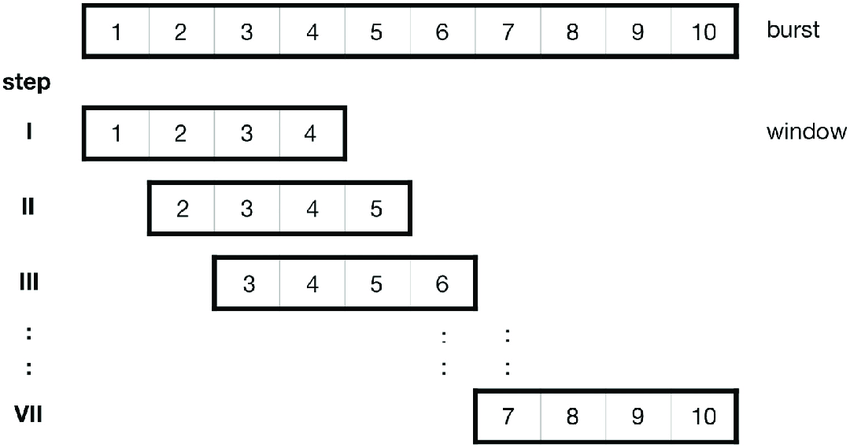

In [ ]:
# 2006-01-01 to 2006-01-07 — labelled as 2006-01-04
# 2006-01-02 to 2006-01-08 — labelled as 2006-01-05
# 2006-01-03 to 2006-01-09 — labelled as 2006-01-06

edf.rolling(7, center=True).mean()

,consumption,wind,solar,wind_solar,year,month
date,,,,,,
2006-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN,2006.0,1.0
2006-01-05,1381.300143,NaN,NaN,NaN,2006.0,1.0
...,...,...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429,2017.0,12.0
2017-12-28,1203.265211,604.699143,19.240143,623.939286,2017.0,12.0
2017-12-29,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
edf.rolling(3).sum()

,consumption,wind,solar,wind_solar,year,month
date,,,,,,
2006-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,3892.23800,NaN,NaN,NaN,6018.0,3.0
2006-01-04,4280.27100,NaN,NaN,NaN,6018.0,3.0
2006-01-05,4376.88100,NaN,NaN,NaN,6018.0,3.0
...,...,...,...,...,...,...
2017-12-27,3505.34112,1699.770,63.218,1762.988,6051.0,36.0
2017-12-28,3693.92172,1618.384,61.615,1679.999,6051.0,36.0
2017-12-29,3858.89242,1485.208,60.546,1545.754,6051.0,36.0


## Referencias
- https://pandas.pydata.org/docs/user_guide/groupby.html
- https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_groups/
- https://www.geeksforgeeks.org/apply-operations-to-groups-in-pandas/
- https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5
- https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://pypi.org/project/python-dateutil/
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/


## Lectura complementaria
- https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html
- https://towardsdatascience.com/pandas-resample-tricks-you-should-know-for-manipulating-time-series-data-7e9643a7e7f3
- https://ourcodingclub.github.io/tutorials/pandas-time-series/